# Task f
Backwards Time devolepment (1 and 5 steps back)

Using 3 different solvers for linear equations.

Compare efficency and accuracy

In [15]:
from tools import simulate, inital_state_task_f, generate_matrix_simple
import matplotlib.pyplot as plt

In [16]:
# Parameter
nodes = 21
connections = [-2,-1,1,2]
steps = [1,5]

In [17]:
# generate matrix
t_matrix = generate_matrix_simple(nodes,connections)
# generate inital state
inital_state = inital_state_task_f(nodes)

In [18]:
# Now we need to find 3 different solvers
from  scipy.sparse.linalg import spsolve
from numpy.linalg import solve
from scipy.sparse.linalg import bicgstab
import numpy as np

# all of them we used at some time during the lectures/github or I found them on the internet.

# We all the funciton with their standard implementation and starting at numpy arrays, to compare them correctly

t_matrix_5 = np.linalg.matrix_power(t_matrix,5)

In [19]:
%timeit x_spsolve = spsolve(t_matrix,inital_state)
%timeit x_spsolve_5 = spsolve(t_matrix_5,inital_state)

<magic-timeit>:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format


530 µs ± 164 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
507 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:

%timeit x_solve = solve(t_matrix,inital_state)
%timeit x_solve_5 = solve(t_matrix_5,inital_state)

90.4 µs ± 33.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
161 µs ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
%timeit x_bicgstab, _ =  bicgstab(t_matrix,inital_state)
%timeit x_bicgstab_5, _ =  bicgstab(t_matrix_5,inital_state)

1.11 ms ± 431 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
8.04 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
print(x_bicgstab)
print(x_solve)
print(x_spsolve)

[-4.39243973  4.8987875  -2.61861116  3.82521755 -2.99823043  1.71805368
 -2.12465786  1.96433589 -0.11272918  1.01933172 -0.41456559 -1.03704159
  0.49407575 -0.76550782  2.52480739 -1.69612678  2.23422353 -3.74352205
  3.15013338 -3.46600654  5.18583088]
[-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499]
[-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499]


Für den verlgeich schauen wir uns am Ende die jeweilge abweichung von den anderen Methoden an und gegebenenfalls von der invertierten Matrix

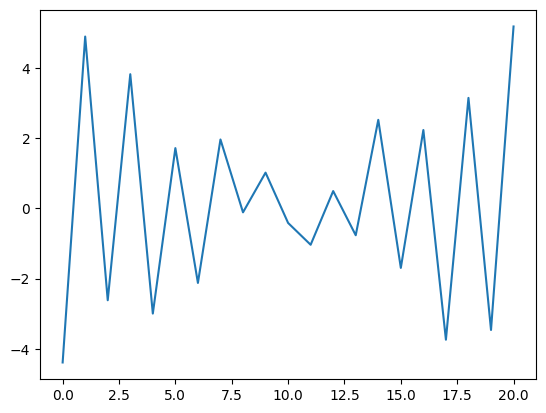

In [23]:
plt.plot(x_bicgstab)



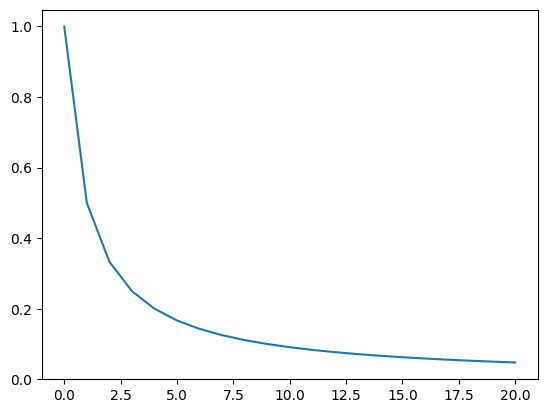

In [24]:
plt.plot(t_matrix @ x_bicgstab)